In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import integrate

In [0]:
def u(x, w, b):
    return x*w + b

In [0]:
def activation(x):
    return np.tanh(x)

In [0]:
def y(u1, u2, w1, w2, b):
    return w1*activation(u1) + w2*activation(u2) + b

In [0]:
def ddfddx(f, x, dx):
    return (f(x+dx) - 2*f(x) + f(x-dx)) / (2*dx)

In [0]:
def dfdx(f, x, dx):
    return (f(x+dx) - f(x-dx)) / (2*dx)

In [0]:
def phi(x, w11, w21, w12, w22, b11, b21, b):
    return np.exp(y(u(x, w11, b11), u(x, w21, b21), w12, w22, b))

In [0]:
def Hphi(x, dx, w11, w21, w12, w22, b11, b21, b):
    def phix(x):
        return np.exp(y(u(x, w11, b11), u(x, w21, b21), w12, w22, b))
    # return -ddfddx(phix, x, dx) + x**2
    return -ddfddx(phix, x, dx) + x**4 - x**2

In [0]:
def sampling(phix, sampling_num=10000):
    x0 = np.random.randn()
    sampled_x = [x0]

    for i in range(sampling_num):
        next_x = 10.0 * (np.random.rand() - 0.5)
        # phi_eval = phi(sampled_x[-1], w11, w21, w12, w22, b11, b21, b)
        # phi_eval_next = phi(next_x, w11, w21, w12, w22, b11, b21, b)
        phi_eval = phix(sampled_x[-1])
        phi_eval_next = phix(next_x)
        if np.random.rand() < (phi_eval_next**2 / phi_eval**2):
            sampled_x.append(next_x)
        else:
            sampled_x.append(sampled_x[-1])
    
    return sampled_x

In [0]:
def Hmean(dx, w11, w21, w12, w22, b11, b21, b):
    def phix(x):
        return np.exp(y(u(x, w11, b11), u(x, w21, b21), w12, w22, b))
    def Hphix(x):
        return Hphi(x, dx, w11, w21, w12, w22, b11, b21, b)
    sampled_x = sampling(phix, 20000)
    # denominator = sum([phix(x)**2 for x in sampled_x]) / len(sampled_x)
    # numerator = sum([phix(x)*Hphix(x) for x in sampled_x]) / len(sampled_x)

    # return numerator / denominator
    return sum([Hphix(x) for x in sampled_x]) / len(sampled_x)

    # denominator = integrate.quad(lambda x: phix(x)**2, -5.0, 5.0)[0]
    # numerator = integrate.quad(lambda x: phix(x)*Hphix(x), -5.0, 5.0)[0]

    # return numerator / denominator

In [0]:
DX = 1e-3

In [0]:
w11, w21, w12, w22, b11, b21, b = np.random.randn(7)

In [70]:
w12

0.3966254452075601

In [0]:
xs = np.linspace(-5, 5, 60)

In [0]:
phis = []

for x in xs:
    phis.append(phi(x, w11, w21, w12, w22, b11, b21, b))

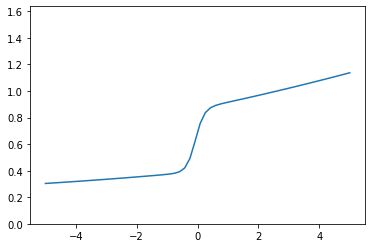

In [73]:
plt.ylim([0, max(phis)+0.5])
plt.plot(xs, phis)

In [74]:
np.random.rand()

0.05303987877415772

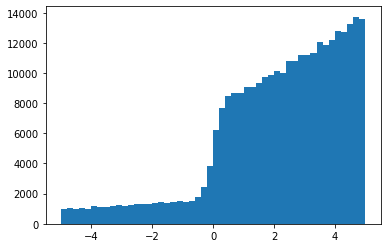

In [75]:
def phix(x):
    return np.exp(y(u(x, w11, b11), u(x, w21, b21), w12, w22, b))

_ = plt.hist(sampling(phix, 300000), bins=50)

In [76]:
Hmean(DX, w11, w21, w12, w22, b11, b21, b)

134.48872792102281

In [0]:
ALPHA = 1e-2

In [0]:
DELTA_PARAM = 1e-2



  0%|          | 0/100 [00:00<?, ?it/s]

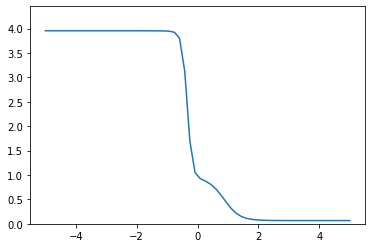



  1%|          | 1/100 [00:10<16:38, 10.08s/it]

  2%|▏         | 2/100 [00:19<16:21, 10.02s/it]

  3%|▎         | 3/100 [00:29<16:07,  9.97s/it]

  4%|▍         | 4/100 [00:39<15:54,  9.95s/it]

  5%|▌         | 5/100 [00:49<15:42,  9.92s/it]

  6%|▌         | 6/100 [00:59<15:31,  9.91s/it]

  7%|▋         | 7/100 [01:09<15:21,  9.91s/it]

  8%|▊         | 8/100 [01:19<15:09,  9.89s/it]

  9%|▉         | 9/100 [01:29<14:59,  9.88s/it]

 10%|█         | 10/100 [01:39<14:51,  9.90s/it]

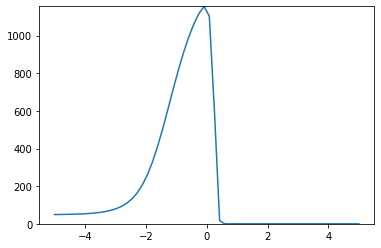



 11%|█         | 11/100 [01:49<14:44,  9.94s/it]

 12%|█▏        | 12/100 [01:58<14:31,  9.91s/it]

 13%|█▎        | 13/100 [02:08<14:23,  9.92s/it]

 14%|█▍        | 14/100 [02:18<14:13,  9.93s/it]

 15%|█▌        | 15/100 [02:28<14:01,  9.91s/it]

 16%|█▌        | 16/100 [02:38<13:52,  9.91s/it]

 17%|█▋        | 17/100 [02:48<13:44,  9.94s/it]

 18%|█▊        | 18/100 [02:58<13:35,  9.95s/it]

 19%|█▉        | 19/100 [03:08<13:22,  9.91s/it]

 20%|██        | 20/100 [03:18<13:11,  9.89s/it]

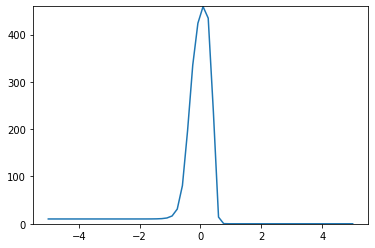



 21%|██        | 21/100 [03:28<13:07,  9.96s/it]

 22%|██▏       | 22/100 [03:38<12:55,  9.94s/it]

 23%|██▎       | 23/100 [03:48<12:43,  9.92s/it]

 24%|██▍       | 24/100 [03:57<12:32,  9.91s/it]

 25%|██▌       | 25/100 [04:07<12:21,  9.89s/it]

 26%|██▌       | 26/100 [04:17<12:10,  9.88s/it]

 27%|██▋       | 27/100 [04:27<12:01,  9.89s/it]

 28%|██▊       | 28/100 [04:37<11:51,  9.88s/it]

 29%|██▉       | 29/100 [04:47<11:40,  9.87s/it]

 30%|███       | 30/100 [04:57<11:29,  9.85s/it]

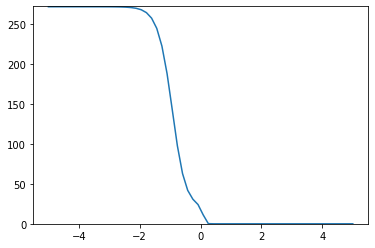



 31%|███       | 31/100 [05:07<11:24,  9.92s/it]

 32%|███▏      | 32/100 [05:17<11:16,  9.94s/it]

 33%|███▎      | 33/100 [05:27<11:04,  9.91s/it]

 34%|███▍      | 34/100 [05:36<10:54,  9.92s/it]

 35%|███▌      | 35/100 [05:46<10:45,  9.93s/it]

 36%|███▌      | 36/100 [05:56<10:35,  9.93s/it]

 37%|███▋      | 37/100 [06:06<10:26,  9.95s/it]

 38%|███▊      | 38/100 [06:16<10:14,  9.91s/it]

 39%|███▉      | 39/100 [06:26<10:04,  9.90s/it]

 40%|████      | 40/100 [06:36<09:54,  9.91s/it]

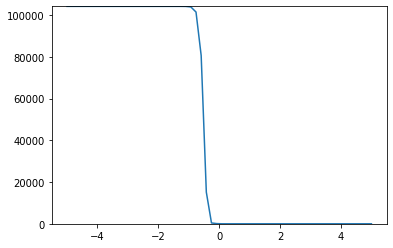



 41%|████      | 41/100 [06:46<09:47,  9.95s/it]

 42%|████▏     | 42/100 [06:56<09:38,  9.97s/it]

 43%|████▎     | 43/100 [07:06<09:24,  9.90s/it]

 44%|████▍     | 44/100 [07:16<09:15,  9.91s/it]

 45%|████▌     | 45/100 [07:26<09:04,  9.90s/it]

 46%|████▌     | 46/100 [07:35<08:52,  9.86s/it]

 47%|████▋     | 47/100 [07:45<08:42,  9.86s/it]

 48%|████▊     | 48/100 [07:55<08:33,  9.88s/it]

 49%|████▉     | 49/100 [08:05<08:23,  9.88s/it]

 50%|█████     | 50/100 [08:15<08:13,  9.87s/it]

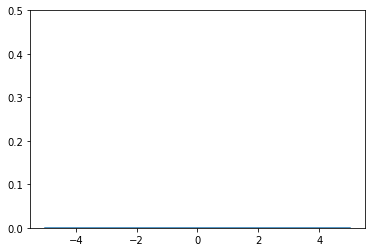



 51%|█████     | 51/100 [08:25<08:05,  9.90s/it]

 52%|█████▏    | 52/100 [08:35<07:56,  9.93s/it]

 53%|█████▎    | 53/100 [08:45<07:47,  9.94s/it]

 54%|█████▍    | 54/100 [08:55<07:37,  9.95s/it]

 55%|█████▌    | 55/100 [09:05<07:28,  9.97s/it]

 56%|█████▌    | 56/100 [09:15<07:18,  9.96s/it]

 57%|█████▋    | 57/100 [09:25<07:08,  9.96s/it]

 58%|█████▊    | 58/100 [09:35<06:59,  9.98s/it]

 59%|█████▉    | 59/100 [09:45<06:49, 10.00s/it]

 60%|██████    | 60/100 [09:55<06:39,  9.98s/it]

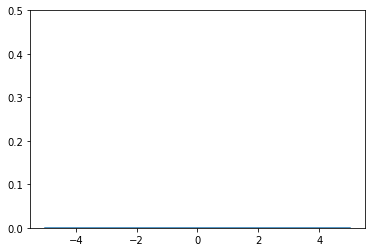



 61%|██████    | 61/100 [10:05<06:30, 10.00s/it]

 62%|██████▏   | 62/100 [10:14<06:17,  9.92s/it]

 63%|██████▎   | 63/100 [10:24<06:05,  9.87s/it]

 64%|██████▍   | 64/100 [10:34<05:54,  9.84s/it]

 65%|██████▌   | 65/100 [10:44<05:43,  9.81s/it]

 66%|██████▌   | 66/100 [10:53<05:32,  9.78s/it]

 67%|██████▋   | 67/100 [11:03<05:22,  9.76s/it]

 68%|██████▊   | 68/100 [11:13<05:11,  9.75s/it]

 69%|██████▉   | 69/100 [11:23<05:01,  9.74s/it]

 70%|███████   | 70/100 [11:32<04:51,  9.73s/it]

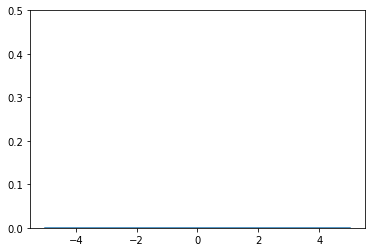



 71%|███████   | 71/100 [11:42<04:43,  9.76s/it]

 72%|███████▏  | 72/100 [11:52<04:34,  9.82s/it]

 73%|███████▎  | 73/100 [12:02<04:24,  9.80s/it]

 74%|███████▍  | 74/100 [12:12<04:16,  9.88s/it]

 75%|███████▌  | 75/100 [12:22<04:07,  9.91s/it]

 76%|███████▌  | 76/100 [12:32<03:57,  9.90s/it]

 77%|███████▋  | 77/100 [12:42<03:48,  9.93s/it]

 78%|███████▊  | 78/100 [12:52<03:38,  9.92s/it]

 79%|███████▉  | 79/100 [13:02<03:28,  9.91s/it]

 80%|████████  | 80/100 [13:12<03:19,  9.95s/it]

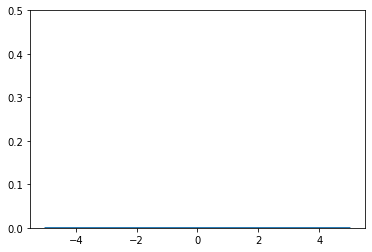



 81%|████████  | 81/100 [13:22<03:09, 10.00s/it]

 82%|████████▏ | 82/100 [13:32<03:00, 10.00s/it]

 83%|████████▎ | 83/100 [13:42<02:50, 10.00s/it]

 84%|████████▍ | 84/100 [13:52<02:39,  9.95s/it]

 85%|████████▌ | 85/100 [14:02<02:29,  9.96s/it]

 86%|████████▌ | 86/100 [14:12<02:19,  9.97s/it]

 87%|████████▋ | 87/100 [14:21<02:09,  9.95s/it]

 88%|████████▊ | 88/100 [14:31<01:59,  9.96s/it]

 89%|████████▉ | 89/100 [14:41<01:49,  9.98s/it]

 90%|█████████ | 90/100 [14:52<01:40, 10.01s/it]

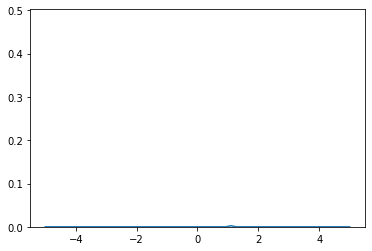



 91%|█████████ | 91/100 [15:01<01:29, 10.00s/it]

 92%|█████████▏| 92/100 [15:11<01:19,  9.95s/it]

 93%|█████████▎| 93/100 [15:21<01:09,  9.88s/it]

 94%|█████████▍| 94/100 [15:31<00:59,  9.87s/it]

 95%|█████████▌| 95/100 [15:41<00:49,  9.87s/it]

 96%|█████████▌| 96/100 [15:50<00:39,  9.83s/it]

 97%|█████████▋| 97/100 [16:00<00:29,  9.84s/it]

 98%|█████████▊| 98/100 [16:10<00:19,  9.85s/it]

 99%|█████████▉| 99/100 [16:20<00:09,  9.81s/it]

100%|██████████| 100/100 [16:30<00:00,  9.82s/it]



In [79]:
N_TRAIN = 100

Hmeans = []

for i in tqdm(range(N_TRAIN)):
    dw11 = (Hmean(DX, w11+DELTA_PARAM, w21, w12, w22, b11, b21, b) - Hmean(DX, w11-DELTA_PARAM, w21, w12, w22, b11, b21, b)) / (2*DELTA_PARAM)
    dw21 = (Hmean(DX, w11, w21+DELTA_PARAM, w12, w22, b11, b21, b) - Hmean(DX, w11, w21-DELTA_PARAM, w12, w22, b11, b21, b)) / (2*DELTA_PARAM)
    dw12 = (Hmean(DX, w11, w21, w12+DELTA_PARAM, w22, b11, b21, b) - Hmean(DX, w11, w21, w12-DELTA_PARAM, w22, b11, b21, b)) / (2*DELTA_PARAM)
    dw22 = (Hmean(DX, w11, w21, w12, w22+DELTA_PARAM, b11, b21, b) - Hmean(DX, w11, w21, w12, w22-DELTA_PARAM, b11, b21, b)) / (2*DELTA_PARAM)
    db11 = (Hmean(DX, w11, w21, w12, w22, b11+DELTA_PARAM, b21, b) - Hmean(DX, w11, w21, w12, w22, b11-DELTA_PARAM, b21, b)) / (2*DELTA_PARAM)
    db21 = (Hmean(DX, w11, w21, w12, w22, b11, b21+DELTA_PARAM, b) - Hmean(DX, w11, w21, w12, w22, b11, b21-DELTA_PARAM, b)) / (2*DELTA_PARAM)
    db = (Hmean(DX, w11, w21, w12, w22, b11, b21, b+DELTA_PARAM) - Hmean(DX, w11, w21, w12, w22, b11, b21, b-DELTA_PARAM)) / (2*DELTA_PARAM)

    Hmeans.append(Hmean(DX, w11, w21, w12, w22, b11, b21, b))

    w11 -= ALPHA * dw11
    w21 -= ALPHA * dw21
    w12 -= ALPHA * dw12
    w22 -= ALPHA * dw22
    b11 -= ALPHA * db11
    b21 -= ALPHA * db21
    b -= ALPHA * db

    if i % 10 == 0:
        phis = []

        for x in xs:
            phis.append(phi(x, w11, w21, w12, w22, b11, b21, b))

        plt.ylim([0, max(phis)+0.5])
        plt.plot(xs, phis)
        plt.show()

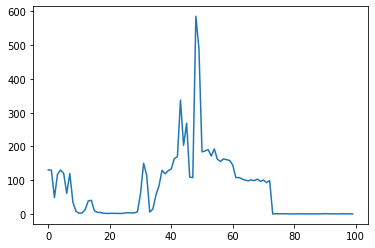

In [80]:
plt.plot(Hmeans)